In [1]:
import Pkg
Pkg.activate("../../../.")
include("../../../LogLoss/RealRealHighDimension.jl")
include("../../../Interpolation/ForecastingMainNew.jl");
using JLD2
using DataFrames

  Activating project at `~/Desktop/QuantumInspiredML`


In [2]:
svpath_ns = "../../../Data/difficult-synthetic/mps_saves/mvar2_tauvar3_legendre_ns_d20_chi80.jld2";
dloc =  "../../../Data/difficult-synthetic/datasets/noisy_trendy_sine_eta_01_m_var2_tau_var3.jld2";

In [3]:
f = jldopen(dloc, "r")
    X_train = read(f, "X_train")
    y_train = read(f, "y_train")
    X_test = read(f, "X_test")
    y_test = read(f, "y_test")
close(f)

In [4]:
f = jldopen(svpath_ns, "r")
    mps_ns = read(f, "mps")
    opts_ns = read(f, "opts")
close(f)
opts_ns, _... = safe_options(opts_ns, nothing, nothing)

fc_ns = load_forecasting_info_variables(mps_ns, X_train, y_train, X_test, y_test, opts_ns);


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                         Summary:

 - Dataset has 300 training samples and 200 testing samples.
 - 1 class(es) was detected. Slicing MPS into individual states...
 - Time independent encoding - Legendre_No_Norm - detected.
 - d = 20, chi_max = 80

 Created 1 forecastable struct(s) containing class-wise mps and test samples.


In [31]:
interp_sites = collect(35:65)
class = 0
stats, p1_ns = any_interpolate_median(fc_ns, class, 123, interp_sites; NN_baseline=true, 
    X_train=X_train, y_train=y_train, n_baselines=1, plot_fits=true, wmad=true)

(Dict(:MAE => 0.27338270550119026, :NN_MAE => 0.2235193683165388), Plots.Plot{Plots.GRBackend}[Plot{Plots.GRBackend() n=4}])

╭────────┬──────────╮
│ Metric │    Value │
├────────┼──────────┤
│    MAE │ 0.273383 │
│ NN_MAE │ 0.223519 │
╰────────┴──────────╯


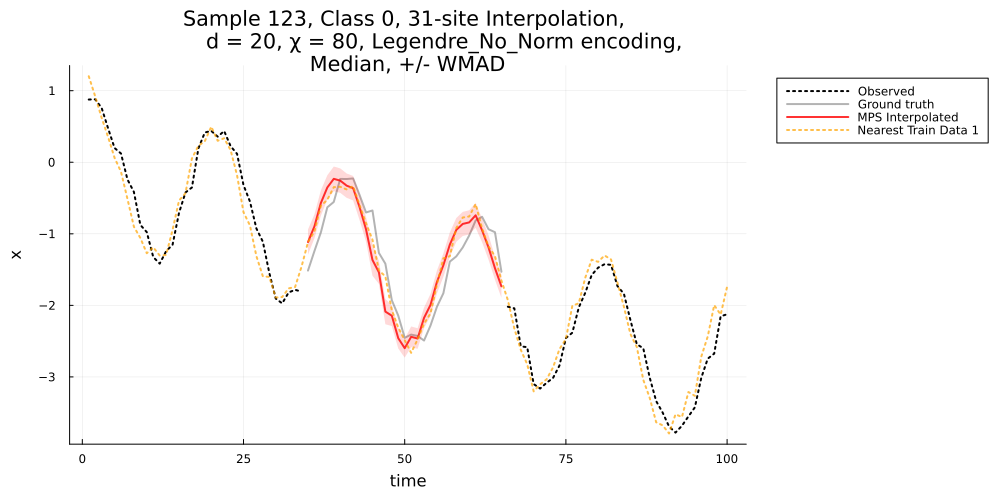

In [30]:
pretty_table(stats; header=["Metric", "Value"], header_crayon= crayon"yellow bold", tf = tf_unicode_rounded);
plot(p1_ns...)